## Importing Libraries

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

## Loading the dataset and viewing its content

In [96]:
df = pd.read_csv('Dataset/new.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [97]:
df.shape

(2240, 29)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [99]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


## To check the null values in the dataset

In [100]:
for col in df.columns:
    temp = df[col].isnull().sum()
    if temp > 0:
        print(f'Column {col} contains {temp} null values.')

Column Income contains 24 null values.


### Note that the null value count is very less (~1%), Hence dropping those records wouldn't affect the dataset

In [101]:
df = df.dropna()
print("Total values in the dataset after removing the null values:", len(df))

Total values in the dataset after removing the null values: 2216


In [102]:
df.nunique()

ID                     2216
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             662
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         554
MntFishProducts         182
MntSweetProducts        176
MntGoldProds            212
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

### Here we can observe that there are columns which contain single values in the whole column so, they have no relevance in the model development.

### Also dataset has a column `Dt_Customer` which contains the date column, we can convert into 3 columns i.e. `day`, `month`, `year`.

In [103]:
parts = df["Dt_Customer"].str.split("-", n=3, expand=True)
df["day"] = parts[0].astype('int')
df["month"] = parts[1].astype('int')
df["year"] = parts[2].astype('int')

In [104]:
df.drop(['Z_CostContact', 'Z_Revenue', 'Dt_Customer'],
        axis=1,
        inplace=True)

## Data Visualization and Analysis

In [105]:
floats, objects = [], []
for col in df.columns:
    if df[col].dtype == object:
        objects.append(col)
    elif df[col].dtype == float:
        floats.append(col)

print(objects)
print(floats)

['Education', 'Marital_Status']
['Income']


### To get the count plot for the columns of the datatype - object, refer the code below

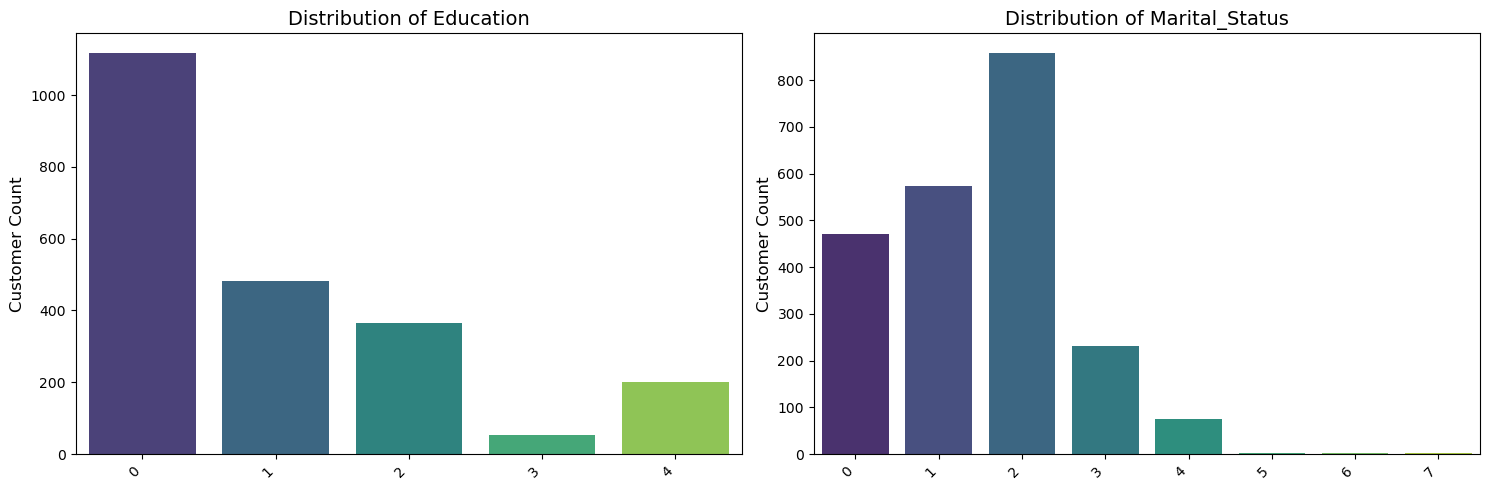

In [106]:
plt.figure(figsize=(15, 5))

# List of the categorical columns we just encoded
objects = ['Education', 'Marital_Status']

for i, col in enumerate(objects):
    plt.subplot(1, 2, i + 1)
    ax = sb.countplot(x=col, data=df, palette='viridis')

    ax.set_xticklabels(label_encoders[col].classes_, rotation=45, ha='right')
    
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(None) # The title makes the x-label redundant
    plt.ylabel('Customer Count', fontsize=12)

plt.tight_layout() # Adjusts plots to prevent them from overlapping
plt.show()

### Checking the value counts of marital_status of the data

In [107]:
df['Marital_Status'].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

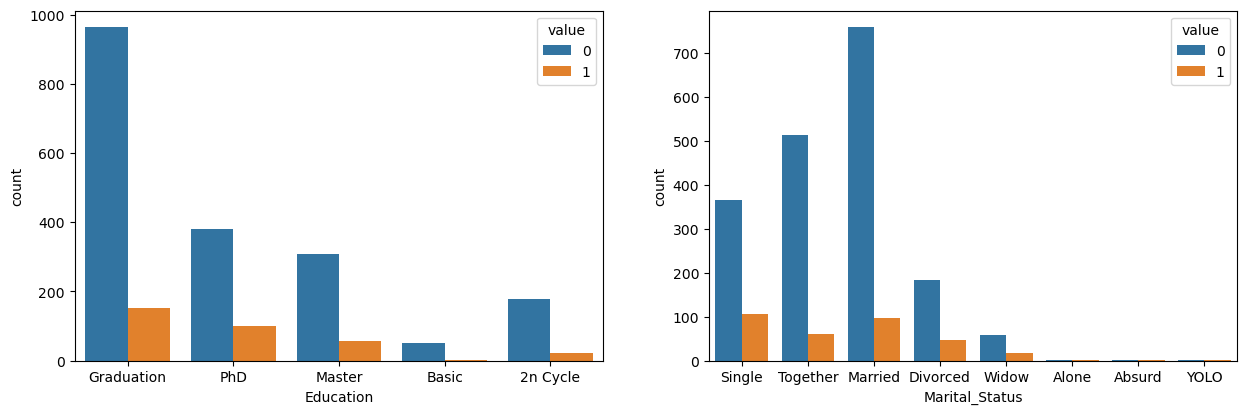

In [108]:
plt.subplots(figsize=(15, 10))
for i, col in enumerate(objects):
    plt.subplot(2, 2, i + 1)

    df_melted = df.melt(id_vars=[col], value_vars=['Response'], var_name='hue')
    sb.countplot(x=col, hue='value', data=df_melted)
plt.show()

## Performing label encoding
### Label Encoding is used to convert the categorical values into the numerical values so that model can understand it.

In [109]:
for col in df.columns:
    if df[col].dtype == object:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

print("Label encoding complete and encoders are stored.")

Label encoding complete and encoders are stored.


### Heatmap is the best way to visualize the correlation among the different features of dataset. Let's give it the value of 0.8

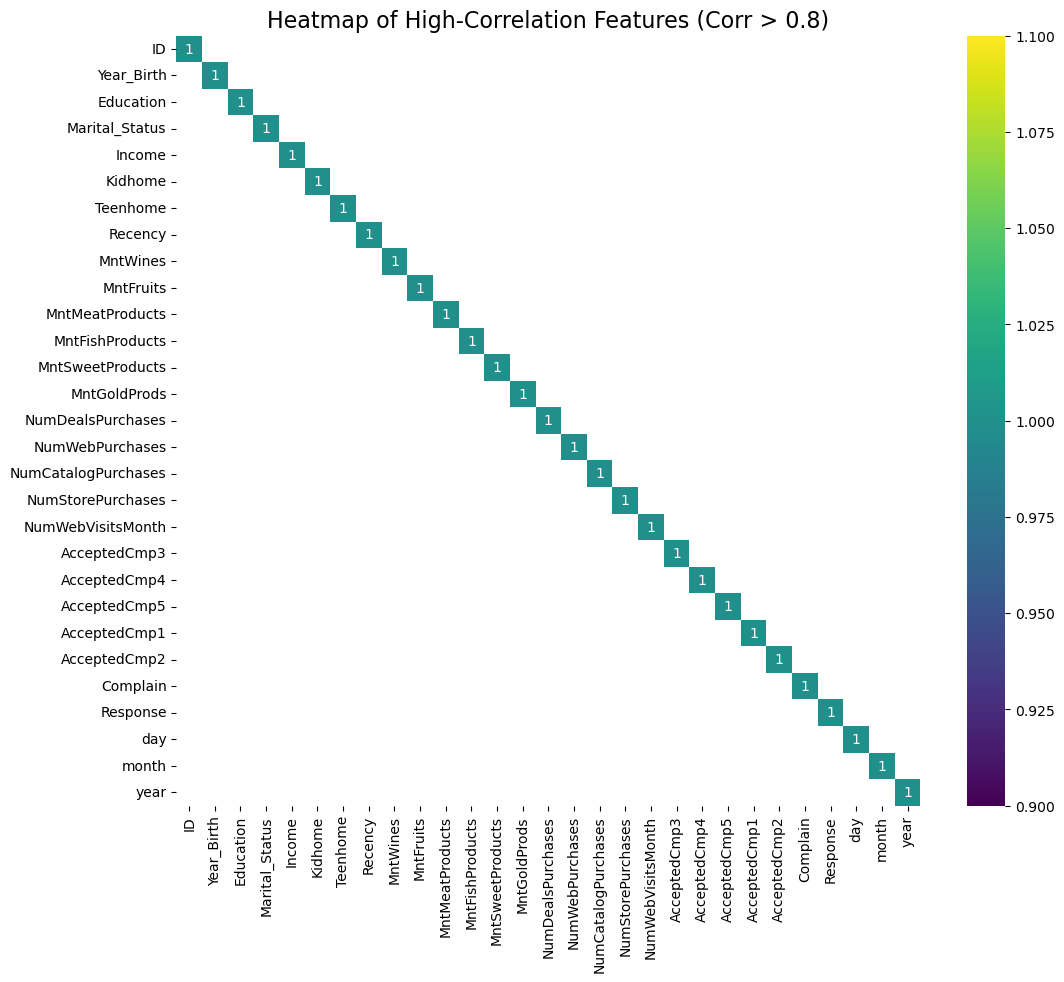

In [110]:
plt.figure(figsize=(12, 10))
# Create a correlation matrix for features with a correlation greater than 0.8
corr_matrix = df.corr()
high_corr_matrix = corr_matrix[abs(corr_matrix) > 0.8]
sb.heatmap(high_corr_matrix, annot=True, cbar=True, cmap='viridis')
plt.title('Heatmap of High-Correlation Features (Corr > 0.8)', fontsize=16)
plt.show()

## Standardisation
### Standardization is the method of feature scaling which is an integral part of feature engineering. It scales down the data and making it easier for the machine learning model to learn from it. It reduces the mean to ‘0’ and the standard deviation to ‘1’.

In [111]:
scaler = StandardScaler()
data = scaler.fit_transform(df)

## Segmentation
### We will be using T-distributed Stochastic Neighbor Embedding (`t-SNE`). It helps in visualizing high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the values to low-dimensional embedding.


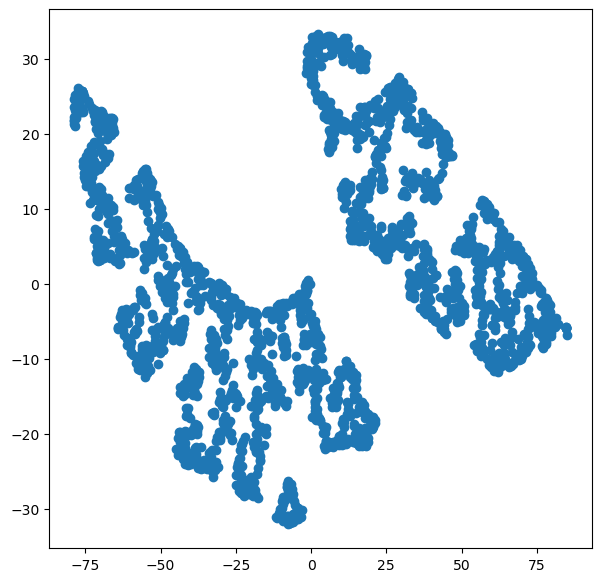

In [112]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(df)
plt.figure(figsize=(7, 7))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1])
plt.show()

### From the above plot we can infer that, there are certainly some clusters which are clearly visual from the 2-D representation of the given data. KMeans Clustering can also be used to cluster the different points in a plane.

In [113]:
error = []
for n_clusters in range(1, 21):
    model = KMeans(init='k-means++',
                   n_clusters=n_clusters,
                   max_iter=500,
                   random_state=22)
    model.fit(df)
    error.append(model.inertia_)

## Elbow Method - by plotting the Within-Cluster Sum of Squares (WCSS)
### Hyperparameter Tuning : Finding the Optimal Number of Clusters with the Elbow Method
### Before we can segment our customers, we need to determine the ideal number of groups (k) to create. The Elbow Method helps us find the point where adding more clusters no longer provides significant value. We are looking for the 'elbow' in the plot below, which represents the best balance between capturing distinct groups and avoiding overfitting.

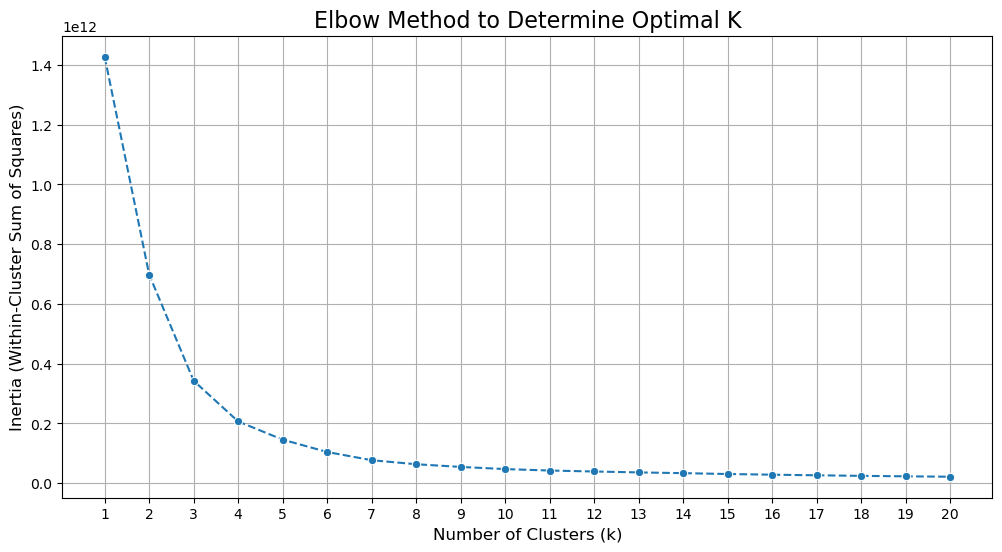

In [114]:
plt.figure(figsize=(12, 6))
sb.lineplot(x=range(1, 21), y=error, marker='o', linestyle='--')
plt.title('Elbow Method to Determine Optimal K', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=12)
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()

### Here by using the elbow method we can say that k = 6 is the optimal number of clusters that should be made as after k = 6 the value of the inertia is not decreasing drastically.

In [115]:
model = KMeans(init='k-means++',
               n_clusters=5,
               max_iter=500,
               random_state=22)
segments = model.fit_predict(df)

## Scatterplot
### Scatterplot will be used to see all the 6 clusters formed by KMeans Clustering

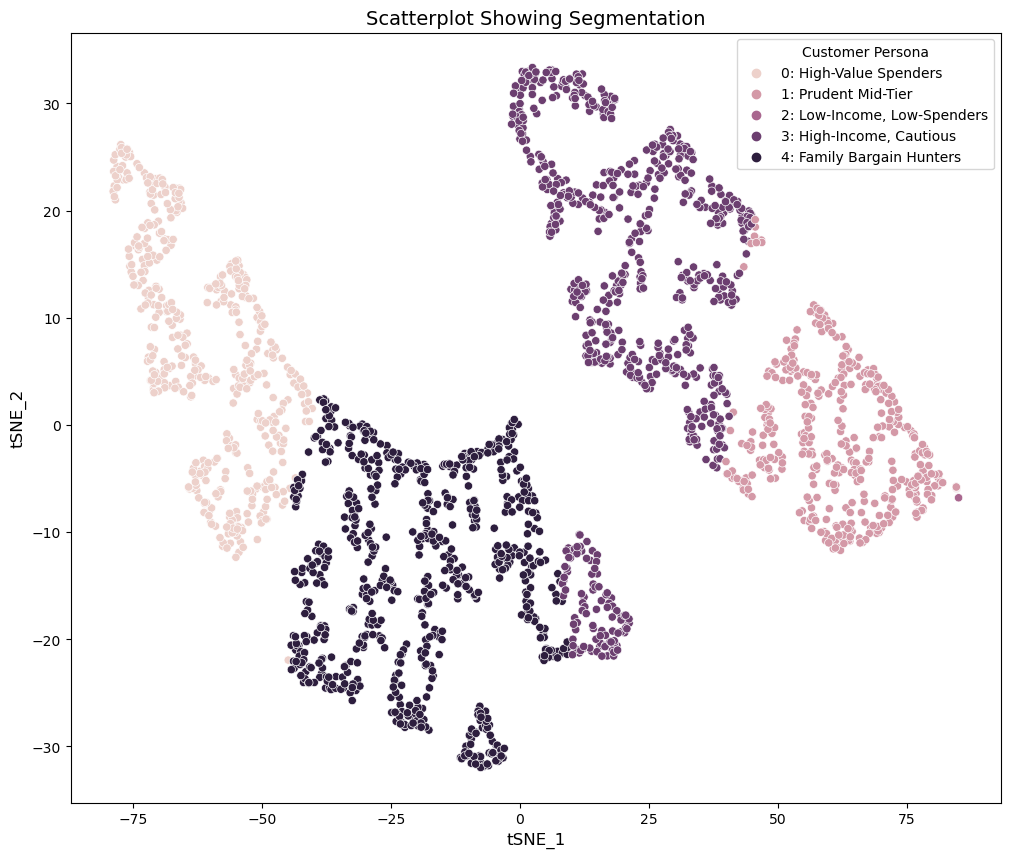

In [116]:

plt.figure(figsize=(12, 10))

df_tsne = pd.DataFrame({'x': tsne_data[:, 0], 'y': tsne_data[:, 1], 'segment': segments})

ax = sb.scatterplot(x='x', y='y', hue='segment', data=df_tsne)
legend_labels = [
    '0: High-Value Spenders', 
    '1: Prudent Mid-Tier', 
    '2: Low-Income, Low-Spenders',
    '3: High-Income, Cautious',
    '4: Family Bargain Hunters'
]

# Set the custom legend
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, legend_labels, title='Customer Persona')
plt.title('Scatterplot Showing Segmentation', fontsize=14)
plt.xlabel('tSNE_1', fontsize=12) 
plt.ylabel('tSNE_2', fontsize=12)
plt.show()

## Adding these segments to the original dataframe so that it correctly distributes customers based on the segmentation we performed

In [127]:
# Add the 'segments' array as a new column to your original DataFrame.
df['Segment'] = segments

# first 5 customers for each segment.

for i in range(5):  # We have 5 segments, from 0 to 4
    print(f"--------------------- Customers in Segment {i} ---------------------\n")
    
    # Filter the DataFrame to show only customers from the current segment
    segment_customers = df[df['Segment'] == i]
    
    # Display the ID and some key features for the first 5 customers in this segment
    # You can add or remove columns here as you like (e.g., 'MntWines', 'Recency')
    print(segment_customers[['ID', 'Income', 'Kidhome', 'Teenhome', 'Segment']].head())
    
    print("\n")

--------------------- Customers in Segment 0 ---------------------

      ID   Income  Kidhome  Teenhome  Segment
3   6182  26646.0        1         0        0
8   4855  30351.0        1         0        0
9   5899   5648.0        1         1        0
11   387   7500.0        0         0        0
14  2569  17323.0        0         0        0


--------------------- Customers in Segment 1 ---------------------

      ID   Income  Kidhome  Teenhome  Segment
15  2114  82800.0        0         0        1
18  6565  76995.0        0         1        1
29  1966  84618.0        0         0        1
40  8601  80011.0        0         1        1
45  1371  79941.0        0         0        1


--------------------- Customers in Segment 2 ---------------------

        ID    Income  Kidhome  Teenhome  Segment
2233  9432  666666.0        1         0        2


--------------------- Customers in Segment 3 ---------------------

     ID   Income  Kidhome  Teenhome  Segment
0  5524  58138.0        0  

## In-depth Segment Analysis
### Analysing the characteristics of each segment by looking at their average values.
### We will use the original dataframe before it was scaled.

In [118]:
mnt_cols = [col for col in df.columns if 'Mnt' in col]
df['TotalSpending'] = df[mnt_cols].sum(axis=1)

# Group by the 'Segment' column and calculate the mean for key features
segment_summary = df.groupby('Segment').agg({
    'Income': 'mean',
    'TotalSpending': 'mean',
    'Recency': 'mean',
    'Kidhome': 'mean',
    'Teenhome': 'mean',
    'NumDealsPurchases': 'mean'
}).reset_index()

# Display the summary table
print("----------- Segment Characteristics (Averages) -----------")
print(segment_summary)

----------- Segment Characteristics (Averages) -----------
   Segment         Income  TotalSpending    Recency   Kidhome  Teenhome  \
0        0   23381.952174      76.086957  48.269565  0.780435  0.206522   
1        1   82719.044335    1421.118227  49.746305  0.071429  0.238916   
2        2  666666.000000      62.000000  23.000000  1.000000  0.000000   
3        3   62867.321375     866.243647  48.508221  0.201794  0.721973   
4        4   42228.492647     226.067647  49.611765  0.669118  0.654412   

   NumDealsPurchases  
0           2.034783  
1           1.280788  
2           4.000000  
3           2.804185  
4           2.666176  


## Determining the Silhouette Score for our Model

In [119]:
from sklearn.metrics import silhouette_score
# data = scaler.fit_transform(df)
# segments = model.fit_predict(df)

silhouette_avg = silhouette_score(data, segments)

print(f"The Silhouette Score for the clustering is: {silhouette_avg:.4f}")

The Silhouette Score for the clustering is: 0.0099


## Silhouette Plot

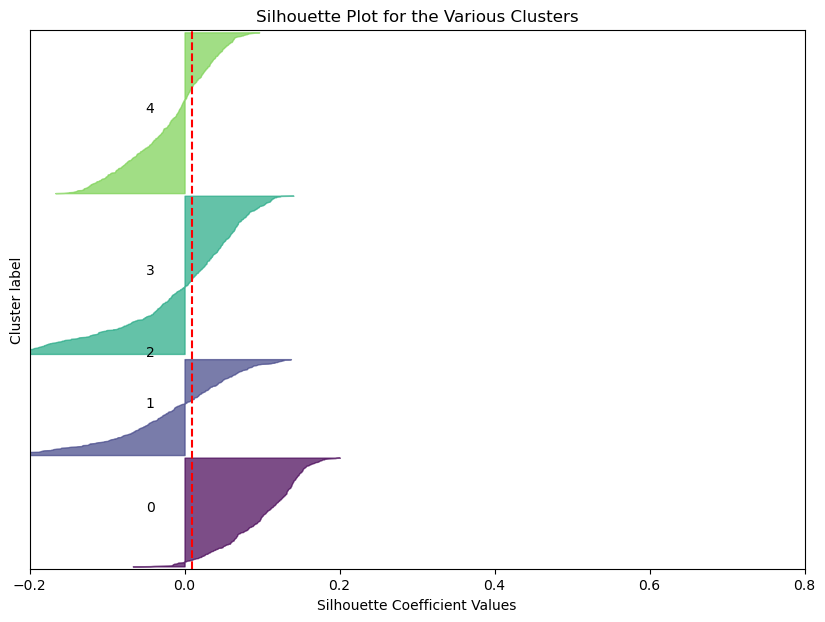

In [120]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples


fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(10, 7)


ax1.set_xlim([-0.2, 0.8])
# Add a blank space between plots for clarity
ax1.set_ylim([0, len(data) + (5 + 1) * 10])

# Calculate silhouette scores for each sample
sample_silhouette_values = silhouette_samples(data, segments)

y_lower = 10
for i in range(5):  
    ith_cluster_silhouette_values = sample_silhouette_values[segments == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.viridis(float(i) / 5)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("Silhouette Plot for the Various Clusters")
ax1.set_xlabel("Silhouette Coefficient Values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  
ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8])

plt.show()

## Our Silhouette Score is 0.0099 which signifies that the clusters are overlapping and the segments do not provide a good distinguished picture of the data
## To deal with that, we will now retrain our model to achieve a decent and better silhouette score. Our goal is to reduce the noise and help the algorithm focus on the features that truly matter.




## Strategic Feature Selection: We will create new, more powerful features (Age, TotalSpending) and select a core group of variables to build our model on.

In [121]:
from sklearn.metrics import silhouette_score

# --- Step 1: Feature Engineering and Selection ---

# Let's create a copy of the dataframe before it was scaled or encoded
df_selected = df.copy()

# Engineer a 'TotalSpending' feature by summing up all the spending columns
mnt_cols = [col for col in df.columns if 'Mnt' in col]
df_selected['TotalSpending'] = df_selected[mnt_cols].sum(axis=1)

# Engineer an 'Age' feature from 'Year_Birth'
df_selected['Age'] = 2025 - df_selected['Year_Birth'] # Using a future year to be safe

# Engineer a 'Children' feature
df_selected['Children'] = df_selected['Kidhome'] + df_selected['Teenhome']

# Select only the most relevant features for customer value segmentation
# We are focusing on demographics and overall behavior, removing noisy columns.
features_to_keep = [
    'Income', 
    'Recency',
    'Age',
    'TotalSpending',
    'Children',
    'NumDealsPurchases'
]

df_final = df_selected[features_to_keep]


# --- Step 2: Retrain the Model on the Selected Features ---

# It's crucial to scale these new features before clustering
scaler_new = StandardScaler()
data_scaled_new = scaler_new.fit_transform(df_final)

# Retrain the K-Means model with our optimal k=5
model_new = KMeans(n_clusters=5, init='k-means++', max_iter=500, random_state=22)
segments_new = model_new.fit_predict(data_scaled_new)


# --- Step 3: Calculate the New Silhouette Score ---
new_silhouette_score = silhouette_score(data_scaled_new, segments_new)

print(f"The Silhouette Score after feature selection is: {new_silhouette_score:.4f}")

The Silhouette Score after feature selection is: 0.2011


# Improved Scatter Plot, Showing Segmentations After Feature Selection

## Running the New TSNE with updated Dataframe (Feature Selected)

In [125]:
from sklearn.manifold import TSNE
import numpy as np 

tsne_new = TSNE(n_components=2, random_state=42)
tsne_data_new = tsne_new.fit_transform(data_scaled_new) # Using the scaled data from Method 1

## Scatter Plot

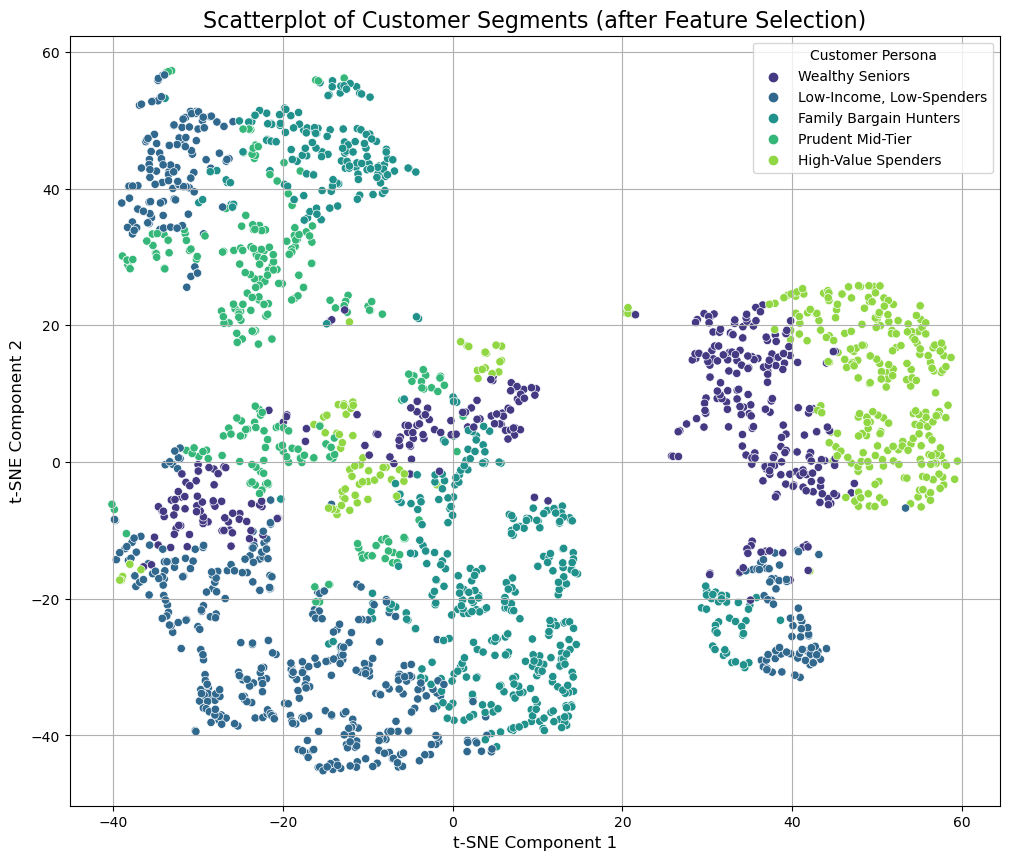

In [130]:
segment_map_new = {
    0: 'High-Value Spenders',
    1: 'Low-Income, Low-Spenders',
    2: 'Prudent Mid-Tier ',
    3: 'Wealthy Seniors',
    4: 'Family Bargain Hunters'
}

# --- Create the new scatterplot ---
plt.figure(figsize=(12, 10))

# Create a new DataFrame for plotting using the NEW t-SNE data and NEW segments
df_tsne_new = pd.DataFrame({
    'x': tsne_data_new[:, 0], 
    'y': tsne_data_new[:, 1], 
    'segment': segments_new
})

# Map the descriptive persona names for the legend
df_tsne_new['persona'] = df_tsne_new['segment'].map(segment_map_new)

# Create the scatterplot with the descriptive legend
ax = sb.scatterplot(x='x', y='y', hue='persona', data=df_tsne_new, palette='viridis')

plt.title('Scatterplot of Customer Segments (after Feature Selection)', fontsize=16)
plt.xlabel('t-SNE Component 1', fontsize=12)
plt.ylabel('t-SNE Component 2', fontsize=12)
ax.legend(title='Customer Persona')
plt.grid(True)
plt.show()

## In-depth Segment Analysis
### Analysing the characteristics of each segment by looking at their average values.
### We will use the new dataframe after feature selection

In [133]:
df_final['Segment_New'] = segments_new

for i in range(5): 
    persona_name = segment_map_new.get(i, "Unknown Segment")
    
    print(f"--------------------- Customers in Segment {i}: {persona_name} ---------------------\n")
    
    # Filter the DataFrame to show only customers from the current segment
    segment_customers = df_final[df_final['Segment_New'] == i]
    
    print(segment_customers.head())
    
    print("\n")

segment_summary_new = df_final.groupby('Segment_New').agg({
    'Income': 'mean',
    'TotalSpending': 'mean',
    'Age': 'mean'
}).reset_index()

print("----------- Characteristics of New Segments (Averages) -----------\n")
print(segment_summary_new)
print("\n")



--------------------- Customers in Segment 0: High-Value Spenders ---------------------

     Income  Recency  Age  TotalSpending  Children  NumDealsPurchases  \
29  84618.0       96   60           1672         0                  1   
40  80011.0        3   45           1395         1                  2   
45  79941.0       72   49            984         0                  1   
51  79143.0        2   61           1693         0                  1   
53  82582.0       54   48           1617         0                  1   

    Segment_New  
29            0  
40            0  
45            0  
51            0  
53            0  


--------------------- Customers in Segment 1: Low-Income, Low-Spenders ---------------------

    Income  Recency  Age  TotalSpending  Children  NumDealsPurchases  \
1  46344.0       38   71             27         2                  2   
3  26646.0       26   41             53         1                  2   
5  62513.0       16   58            716         1   

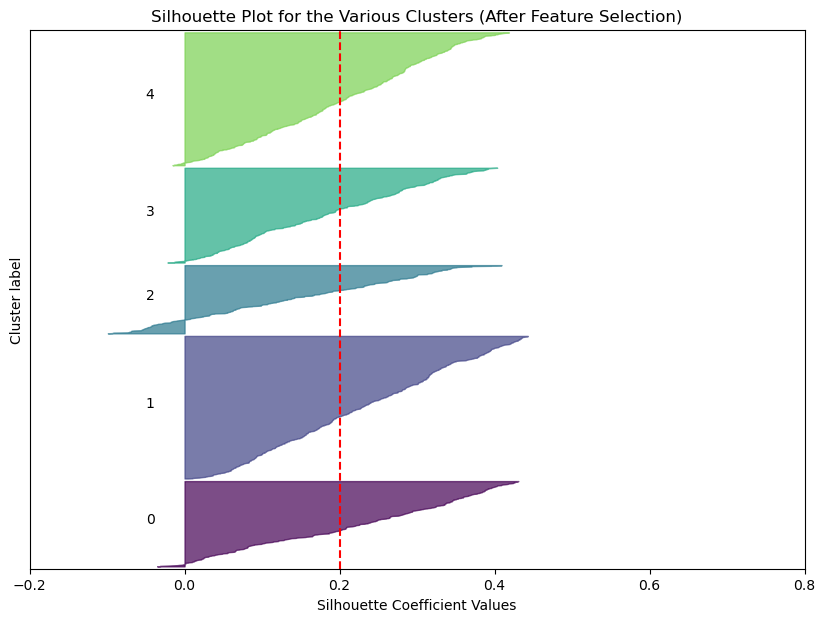

In [124]:
import matplotlib.cm as cm
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score

fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(10, 7)

# The silhouette plot's x-axis will range from -0.2 to 0.8
ax1.set_xlim([-0.2, 0.8])
ax1.set_ylim([0, len(data_scaled_new) + (5 + 1) * 10])

# Calculate silhouette scores for each individual sample
sample_silhouette_values = silhouette_samples(data_scaled_new, segments_new)

y_lower = 10
for i in range(5):  # We have 5 segments
    ith_cluster_silhouette_values = sample_silhouette_values[segments_new == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.viridis(float(i) / 5)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for the next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("Silhouette Plot for the Various Clusters (After Feature Selection)")
ax1.set_xlabel("Silhouette Coefficient Values")
ax1.set_ylabel("Cluster label")

ax1.axvline(x=new_silhouette_score, color="red", linestyle="--")

ax1.set_yticks([]) 
ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8])

plt.show()